# Question 2 – Numpy: Nearest neighbor

In [2]:
import numpy as np
def NNeighbors(A,z):
    if len(A)==0: #check for empty array
        return "Empty List"
    elif len(A)==1: #if only one element return hat element
        return A[0]
    else: #otherwise
        #np.abs(A - z) is uused to calulcate the absolute differences
        return A[np.argmin(np.abs(A - z))]
        
A=np.array([51,21,9,2, 17,12,19,11]) #array A
z=6 #value z
print("The Nearest Value to {} is {}.".format(z,NNeighbors(A,z)))

The Nearest Value to 6 is 9.


# Question 3 – Classes: Binary search tree

In [43]:
'''
(a) Define a class Node, and write the constructor, which takes one argument, value, and initializes
the left and right children to None.
'''
class Node:
    
    def __init__(self, value): #constructor to initialize the node data
        self.left = None #left node
        self.right = None #right node
        self.value = value #value defined by the user
    '''
    (b) Write a function to print the tree.
    '''
    def PrintTree(self,node):
        if (node != None) :
     
            self.PrintTree(node.left)
            if (node.right != None:
                if node.left != None) :
                    print(node.data)
            self.PrintTree(node.right)
    
    '''
    (c) Write a function that inserts a new value in the tree at the right location.
    '''

    # to make perfect to check both leftand right ( with recursion)
    def insertValue(self,node, value):
        
        #check if the given node is null (not defined yet)
        if node is None:
            return Node(value) #initialize it and assign give value to it

        else: #if the root is defined and initialized then we check right and left nodes
            
            
            #insert to the left if the given value is greater then current, branch right
            if node.value < value:
                #print("right")
                node.right = self.insertValue(node.right, value)
        
            elif node.value == value:
                return node
            #branch left if value is greater than current node
            else:
                #print("left")
                node.left = self.insertValue(node.left, value)

        return node
        
    '''
    (d) Write a function that looks up a value in the tree.
    '''
    def lookup(self, node,value):
        # search for the value
        current=node
        while current!=None:
            #print(current.value)
            if current.value==value:
                return True
            #if value less than current, brach to left
            if value<node.value:
                current=current.left
            #if value less than current, brach to right
            else:
                current=current.right
        return False
    
    '''
    (e) Write a function that removes a value from the tree.
    '''
    def delete_Node(self,node, value):
        # if THE root is not defined then return NONE
        if node == None: 
            return node
        
        
        '''
        if the given key is greater than the value of the current node
        then we branch to the left
        '''
        if node.value > value: 
            node.left = self.delete_Node(node.left, value)
        
        #otherwise we branch to the right
        
        elif node.value < value: 
            node.right= self.delete_Node(node.right, value)
        else: 
            # If the right node is null, then assign the left node as a root
            if not node.right:
                return node.left
            #otherwise assign the left
            if not node.left: 
                return node.right
            #in the case of the node has both left and right node then
            t_value = node.right
            m_value = t_value.value
            while t_value.left:
                t_value = t_value.left
                m_value = t_value.value
            ndoe.right = deleteNode(node.right,node.value)
        return node

In [46]:
root=Node(9)
root.insertValue(root,12)
root.insertValue(root,19)
root.insertValue(root,18)
root.insertValue(root,10)
root.delete_Node(root,10) #remove 10
root.lookup(root,10) #check if node 10 exists

False

# Question 4 – Scipy: Optimization

In [7]:
import scipy.optimize as opt
import math
def Q4(x):  
    #$f(x) = sin^2(x − 2)$
    first_term=math.pow(np.sin(x-2), 2)
    #e^{-x^2}
    second_term=np.exp(-1*(math.pow(x,2)))
    #here, wea are dealing with the minimum value,
    #that why we return the negative value of it
    return  (first_term * second_term) * (-1)
    
optimum_value = opt.minimize_scalar(Q4).x #Minimization of scalar function of one variable.
print("The Optimum value is: ",optimum_value)
#maximum of the function
print("F({})={}".format(round(optimum_value,4),round(-Q4(optimum_value),4)))

The Optimum value is:  0.2162413285869684
F(0.2162)=0.9117


# Question 5 – Scipy: Pairwise distances

In [16]:

n,m=7,19 #n -> #rows, m-> #columns
#generate a random matrix
x_matrix=np.random.rand(n,m) #generate a random matrix of m by n
print(x_matrix[:3,:3])

'''
Answer: to calculate the pairwise distance between rows
we have to use the function {pdist} implemented in scipy.spatial.distance
by imporintg scipy.spatial.distance as dis.
this function calculates the pairwise distances between observations in
n-dimensional space (as described in their repo).

'''
from scipy.spatial import distance

#calculate the pairwise distances
pairwise_distance = distance.pdist(x_matrix)
print("\n\nChecking Shapes")
print (pairwise_distance.shape)
# to check, i am cacluting the number of pairs and check if we output k distances
print((n*(n-1))/2) #10 and 10., so true
pairwise_distance

[[0.7644567  0.10887543 0.64208373]
 [0.81760762 0.49742506 0.1987905 ]
 [0.73114665 0.0302186  0.02813358]]


Checking Shapes
(21,)
21.0


array([1.4534068 , 1.66527939, 1.29855125, 1.62175618, 1.7406981 ,
       1.97503284, 1.43508975, 1.42714234, 1.42781937, 1.69298847,
       1.76599505, 1.60887494, 1.85849272, 1.91867921, 1.79761337,
       1.80171702, 1.93604363, 1.44985002, 1.83365354, 2.12736665,
       1.96503915])

In [17]:
#generate random cordinates
cordinates = [(np.random.rand(),np.random.rand()) for i in range(n)]
for i in cordinates:
    print(i)

#calculate distances between the random generated cordinates
pairwise_distance=distance.cdist(cordinates,cordinates, 'euclidean')
print (pairwise_distance.shape)
# to check, i am cacluting the number of pairs and check if we output k distances
print((n*(n-1))/2) #10 and 10., so true
#printing the table
print("|From|\t\t|To|\t\t|Distance|")
print("----------------------------------------------------")
for i in range (n):
    for j in range (i+1,n):
        
        print("|City_{}|\t|City_{}|\t|{}|".format(i,j,pairwise_distance[i,j]))
        print("----------------------------------------------------")
        

(0.11850251643626186, 0.595639026280855)
(0.5583491157614379, 0.13449426441337708)
(0.6831580717935837, 0.7677496955287982)
(0.9618027087938052, 0.5352425990217529)
(0.7771760165638452, 0.28374287481001437)
(0.6027896990956837, 0.5578634387189153)
(0.6085259261076792, 0.09667716532078319)
(7, 7)
21.0
|From|		|To|		|Distance|
----------------------------------------------------
|City_0|	|City_1|	|0.6372750758783328|
----------------------------------------------------
|City_0|	|City_2|	|0.5903032937946903|
----------------------------------------------------
|City_0|	|City_3|	|0.8454601959027601|
----------------------------------------------------
|City_0|	|City_4|	|0.7287866553886968|
----------------------------------------------------
|City_0|	|City_5|	|0.4857582426514757|
----------------------------------------------------
|City_0|	|City_6|	|0.6993467528477841|
----------------------------------------------------
|City_1|	|City_2|	|0.6454376163061865|
-----------------------------

# Question 6 – Matplotlib: Data

In [18]:
n,m=10,20
x_values = np.random.randn(m, n)
# Generate a vector b with parameters (normally distributed both b and z)
b_values =  np.random.normal(size=(n)) #parameters
z_values = np.random.normal(size=(m)) #z values
#y = Xb+z 
y = np.dot(x_values, b_values) + z_values

In [20]:
def Q6(x, y):
    # solution to a linear matrix equation
    return np.linalg.lstsq(x_values, y)[0]


In [21]:
x_est=Q6(x_values,y)
x_est

<ipython-input-20-725352aedebc>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(x_values, y)[0]


array([ 1.42971763,  1.15195585, -0.47477856, -0.43158536,  0.80905552,
        0.31879073, -1.45285326,  1.08201995,  0.04781375,  0.43728963])

In [22]:
b_values

array([ 0.99951417,  1.06039379, -0.45716867, -0.53151811,  0.85810516,
        0.14592809, -1.15619756,  1.05973162, -0.07578735,  0.30536134])

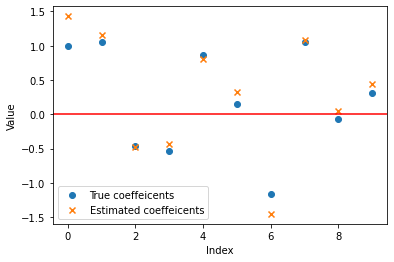

In [23]:
import matplotlib.pyplot as plt

#plot
#plot the function
plt.scatter([i for i in range (n)], b_values,marker="o",label="True coeffeicents")
plt.scatter([i for i in range (n)],x_est,marker='x',label="Estimated coeffeicents")
plt.axhline(y=0, color='r', linestyle='-')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc=0)
plt.show()

# Question 1 – Functions: Root finding

In [24]:
import numpy as np

In [25]:
'''
(a) 
'''

#in this implementation i will be using the bisection method
def root(f,a,b): 
    
    s=a #starting
    b=b #bound
    
    
    #defined threshold 
    threshold=0.001 #threshold for convergence
    while abs(s-b)>= threshold:
        mid=(s+b)/2.0 #calculate the nmid interval
        
        #check the function results
        res=f(mid)*f(s)
        
        #if the result is greater than the threshold
        if res>threshold:
            s=mid
        else:
            if threshold>res:
                b=mid
    
    return mid


In [26]:
# i used the function defined in question 4
root(Q4,1,500)

1.4882564544677734

In [27]:
'''
(b) 
'''
#in this implementation i will be using the bisection method
def root(f,a,b): 
    
    #now, we need to check which one is greater and which is smaller before calculating
    s=min(a,b) #starting
    b=max(a,b) #bound
    
    if f(s)*f(b)>0:
        s=-900#random value i am assigning mimumum value for s
    #defined threshold
    threshold=0.001 #threshold for convergence
    while abs(s-b)>= threshold:
        mid=(s+b)/2.0 #calculate the nmid interval
        
        #check the function results
        res=f(mid)*f(s)
        
        #if the result is greater than the threshold
        if res>threshold:
            s=mid
        else:
            if threshold>res:
                b=mid
    
    return mid


In [28]:
# i used the function defined in question 4
root(Q4,1,500)

1.4882564544677734

In [29]:
'''
c
'''
'''
Add a check that prints
’function evals have same sign’
if f(a) > 0 and f(b) > 0 or if f(a) < 0 and f(b) < 0.
'''
#in this implementation i will be using the bisection method
def root(f,a,b): 
    
    s=min(a,b) #starting
    b=max(a,b) #bound
    
    if f(s)*f(b)>0:
        s=-900#random value
    #defined threshold
    threshold=0.001 #threshold for convergence
    while abs(s-b)>= threshold:
        mid=(s+b)/2.0 #calculate the nmid interval
        
        #check the function results
        res=f(mid)*f(s)
        
        #if the result is greater than the threshold 
        if res>threshold:
            s=mid
        else:
            if threshold>res:
                b=mid
        
        if f(s)>0 and f(b)>0:
            print("functions have the same sign")
        elif f(s)<0 and f(b)<0:
             print("functions have the same sign")
    
    return mid


In [30]:
# i used the function defined in question 4
root(Q4,1,500)

functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign
functions have the same sign


1.4882564544677734